# Visualisasi Data

Kita gunakan package Matplotlib dan sample data Imigrasi Canada untuk membuat visualisasi data

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.style.use(['ggplot']) # kita gunakan matplotlib dengan style ggplot

In [2]:
# import data
df_can = pd.read_excel('../dataset/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)

df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [3]:
df_can["Type"].value_counts()

Immigrants    195
Name: Type, dtype: int64

In [4]:
df_can["Coverage"].value_counts()

Foreigners    194
Citizens        1
Name: Coverage, dtype: int64

In [5]:
df_can[df_can["Coverage"] == 'Citizens']

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
32,Immigrants,Citizens,Canada,905,Northern America,905,Northern America,901,Developed regions,0,...,0,0,0,0,0,0,0,1,1,2


kira kira kenapa ada orang Canada yang berimigrasi ke Canada? bisa kita research kalau penasaran

kolom kolom yang mau kita hapus:   
Type, Coverage, AREA, REG, DEV

kolom kolom yang mau kita ubah namanya:   
- OdName: Country
- AreaName: Continent
- RegName: Region
- DevName: Dev

dari data yang bentuknya imigrasi seperti ini, kita bisa coba untuk nanti buat visualisasi perbandingan jumlah imigran tahun ke tahun untuk 1 negara. kita bisa bandingkan jumlah imigran tahun ke tahun antara beberapa negara. kita bisa bandingkan juga per continent, atau per region. kita mencoba mempersiapkan bentuk datanya untuk memudahkan visualisasi nanti

In [6]:
df_can2 = df_can.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'])
df_can2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OdName    195 non-null    object
 1   AreaName  195 non-null    object
 2   RegName   195 non-null    object
 3   DevName   195 non-null    object
 4   1980      195 non-null    int64 
 5   1981      195 non-null    int64 
 6   1982      195 non-null    int64 
 7   1983      195 non-null    int64 
 8   1984      195 non-null    int64 
 9   1985      195 non-null    int64 
 10  1986      195 non-null    int64 
 11  1987      195 non-null    int64 
 12  1988      195 non-null    int64 
 13  1989      195 non-null    int64 
 14  1990      195 non-null    int64 
 15  1991      195 non-null    int64 
 16  1992      195 non-null    int64 
 17  1993      195 non-null    int64 
 18  1994      195 non-null    int64 
 19  1995      195 non-null    int64 
 20  1996      195 non-null    int64 
 21  1997      195 no

sekalian cek tipe data per kolom dan apakah ada missing value

In [7]:
df_can2.isnull().sum()

OdName      0
AreaName    0
RegName     0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64

In [8]:
df_can2.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
df_can3 = df_can2.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region','DevName':'Dev'})
df_can3.head()

,Country,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Country nya adalah value bersifat unik, kita bisa gunakan sebagai index

kita cek dulu apakah value nya unik, baru kita set jadi index

In [10]:
df_can3['Country'].nunique()

195

In [11]:
df_can3.shape

(195, 38)

195 nama negara berbeda, 195 total data, artinya semua nama negaranya beda beda, unik, tidak ada duplikat.

In [12]:
df_can4 = df_can3.set_index('Country')
df_can4.head()

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


# Jenis Jenis Visualisasi
Ada 7 jenis chart yang akan kita buat hari ini, masing masing memiliki kegunaan yang berbeda.

Untuk melihat trend
- Line Plot
- Bar Chart
- Area Plot / Stacked Line Plot

Untuk perbandingan dari sebuah keseluruhan
- Pie Chart

Untuk melihat korelasi antara dua set data
- Scatter Plot

Untuk melihat distribusi data
- Histogram

Untuk melihat penyebaran data
- Box Plot

## Line Plot
misalkan kita mau lihat trend imigrasi orang Indonesia ke Canada dari tahun 1980 - 2013

In [13]:
df_can = df_can4 # ganti nama

In [14]:
df_can.head()

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [16]:
df_indo = df_can.loc[['Indonesia']]
df_indo

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,...,552,632,613,657,661,504,712,390,395,387


In [17]:
# ambil kolom data yang kita inginkan
years = range(1980,2014)

In [18]:
df_indo[years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,186,178,252,115,123,100,127,213,270,260,...,552,632,613,657,661,504,712,390,395,387


plot melihat 1 kolom sebagai 1 garis, jadi kita transpose dulu datanya

In [20]:
df_indo = df_indo[years].T
df_indo

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123
1985,100
1986,127
1987,213
1988,270
1989,260


<AxesSubplot:>

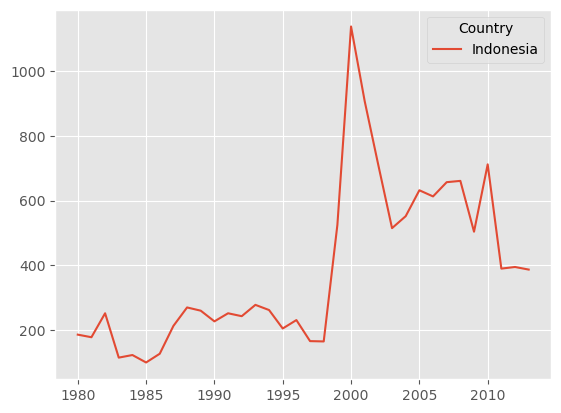

In [21]:
df_indo.plot()

kita gunakan matplotlib punya pyplot (sudah kita import sebagai plt) untuk menambahkan label dan lainnya ke plot kita

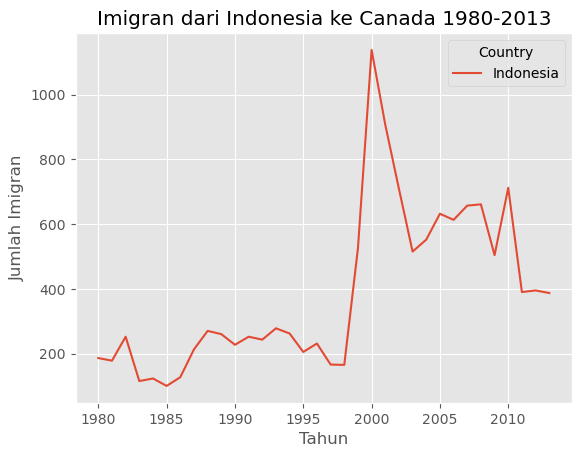

In [22]:
df_indo.plot()

plt.title("Imigran dari Indonesia ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.show()

In [25]:
print("a")
print("b")

a
b


Text(0, 0.5, 'Jumlah Imigran')

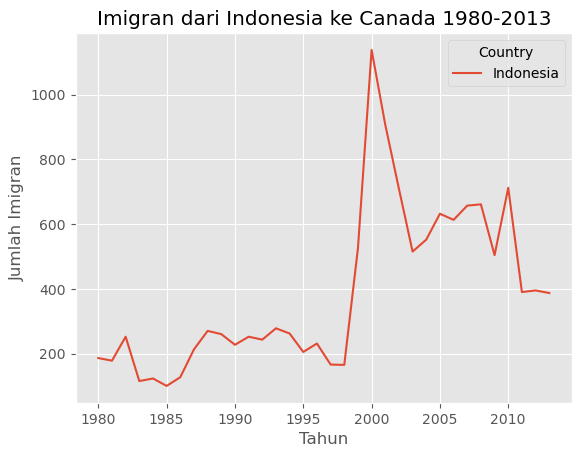

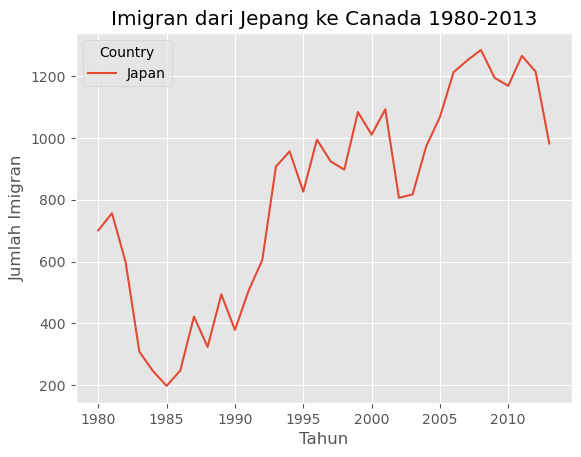

In [29]:
# misalkan kita ambil juga data imigran dari Jepang untuk pembanding
df_indo.plot()

plt.title("Imigran dari Indonesia ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.show()

df_jpn = df_can.loc[["Japan"], years].T
df_jpn.plot()

plt.title("Imigran dari Jepang ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.show()

perhatikan kalau datanya ada 2 set maka jadi 2 plot berbeda. untuk membuat plot yang sama dengan beberapa garis berbeda, kita perlu membuat 1 dataframe dengan beberapa kolom data.

In [30]:
df_indo_jpn = df_can.loc[["Indonesia", "Japan"], years].T
df_indo_jpn.head()

Country,Indonesia,Japan
1980,186,701
1981,178,756
1982,252,598
1983,115,309
1984,123,246


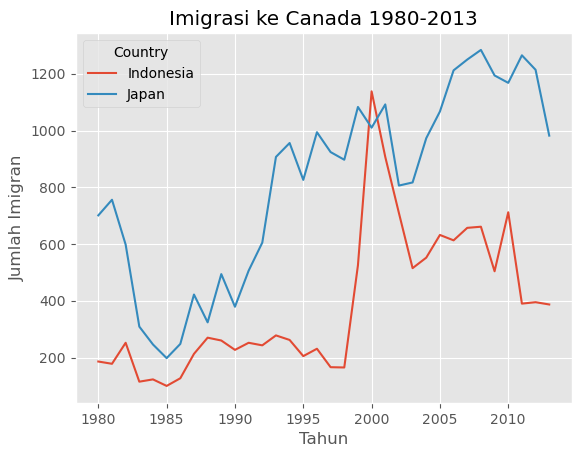

In [32]:
df_indo_jpn.plot()

plt.title("Imigrasi ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.show()

jangan lupa berikan insight dari plot yang sudah dibuat. ada informasi apa yang bisa diambil dari plot ini?

jumlah imigran dari Japan sangat tinggi di tahun 1981 dibandingkan Indonesia. tapi kemudian menurun drastis hampir sama dengan Indonesia, sebelum naik 
lagi di tahun 1990an dan lumyan stabil di atas 800 orang per tahun sejak itu.

Di Indonesia, jumlah imigran relatif lebih rendah di sekitar 200an, sebelum tiba2 melonjak di tahun 1999-2001 tiba2 mencapai 1000+ imigran di tahun 2000. Sejak itu rata2 jumlah imigran per tahun naik 3x lipat di sekitar 600an orang per tahunnya, sebelum turun lagi di tahun 2011 di 400an.

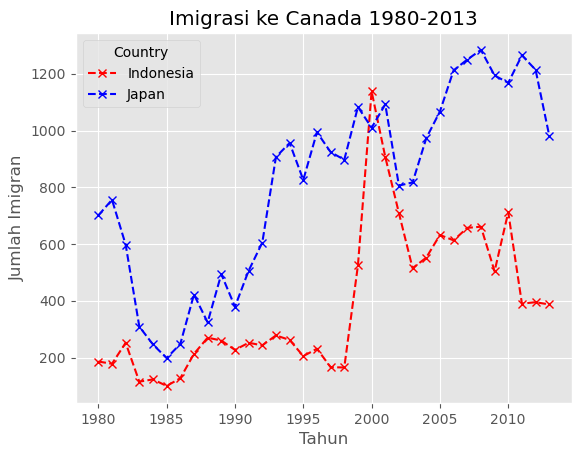

In [41]:
df_indo_jpn.plot(marker="x", linestyle="--", color=["r", "b"])

plt.title("Imigrasi ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.show()

imigrasi kan sebenarnya bisa melonjak tiba2 kalau ada:
- bencana alam
- krisis moneter
- kerusuhan
- dan lainnya, kejadian level nasional yang membuat lebih banyak orang pindah ke negara lain

kita bisa cari dan tambahkan informasi ini jika ketemu, ke grafiknya, menggunakna plt.text

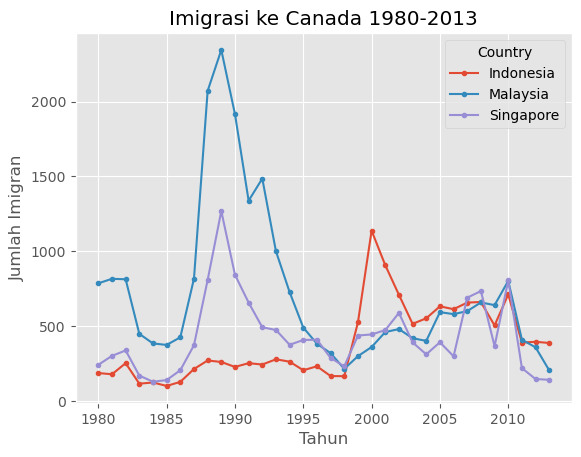

In [42]:
# bandingkan imigrasi Indonesia Malaysia Singapore
df_inmysg = df_can.loc[["Indonesia", "Malaysia", "Singapore"], years].T
df_inmysg.plot(marker=".")

plt.title("Imigrasi ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.show()

terjadi sesuatu di tahun 1987 yang berefek ke Malaysia dan Singapore, Indonesia tidak kena efek tersebut.

Sementara di tahun 1999 ada kejadian yang khusus kena Indonesia saja.

Di tahun 2010 ketiga negara ini mendapat lonjakan kecil jumlah imigran secara bersamaan.

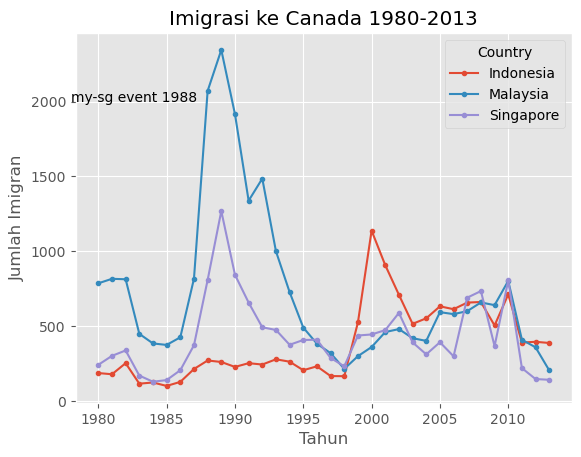

In [46]:
df_inmysg.plot(marker=".")

plt.title("Imigrasi ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.text(1978,2000,"my-sg event 1988")

plt.show()

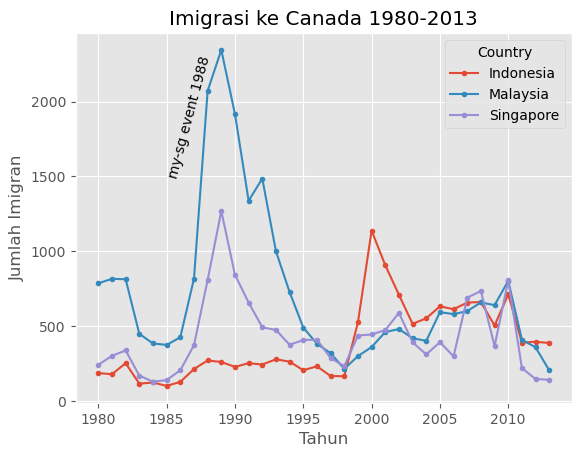

In [56]:
df_inmysg.plot(marker=".")

plt.title("Imigrasi ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.annotate("my-sg event 1988", xy=(1985,1500), rotation=75)

plt.show()

# bar chart dan area chart
trend data yang sama bisa juga kita representasikan menggunakan bar chart dan area chart.

pro bar chart dibandingkan line chart adalah skala data terlihat.

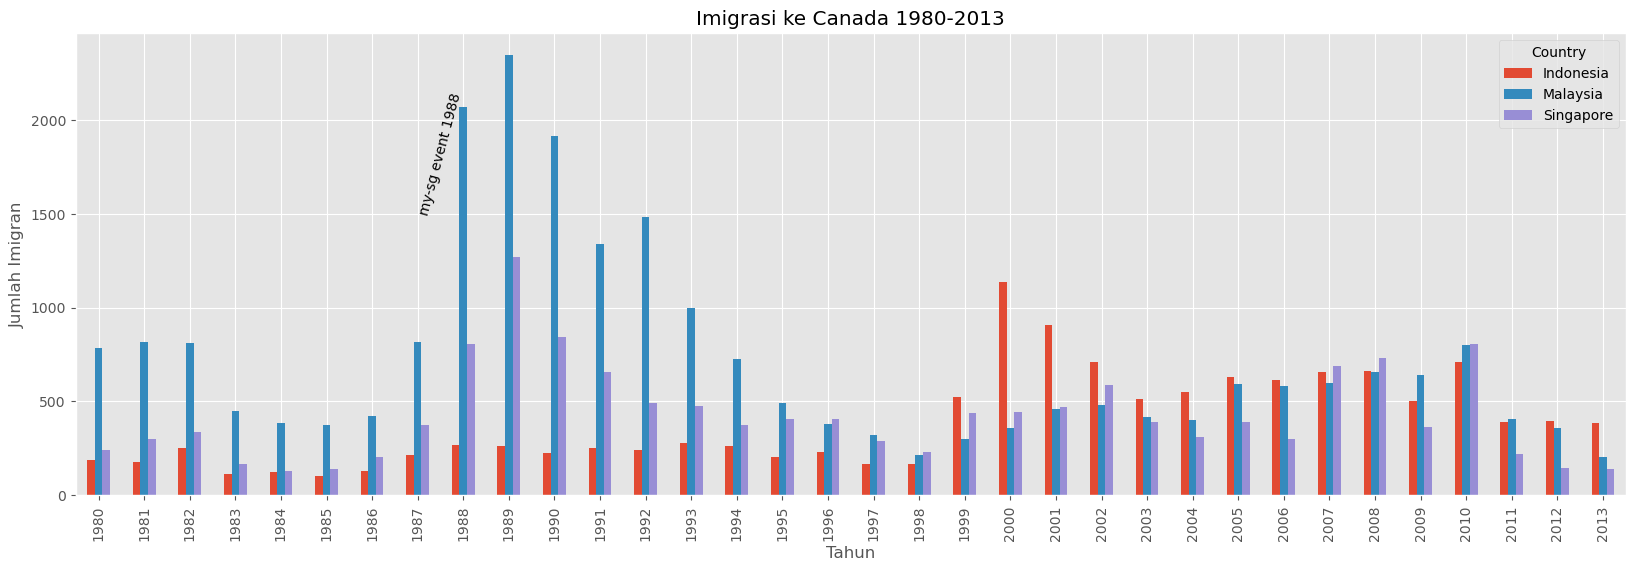

In [61]:
# tambah opsi kind untuk mengubah tipe chart dari line (default) ke tipe lain (bar/ area)
# biar tidak sempit, kita tambahkan opsi untuk ukuran chart nya
df_inmysg.plot(kind="bar", figsize=(20,6))

plt.title("Imigrasi ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.annotate("my-sg event 1988", xy=(7,1500), rotation=75)

plt.show()

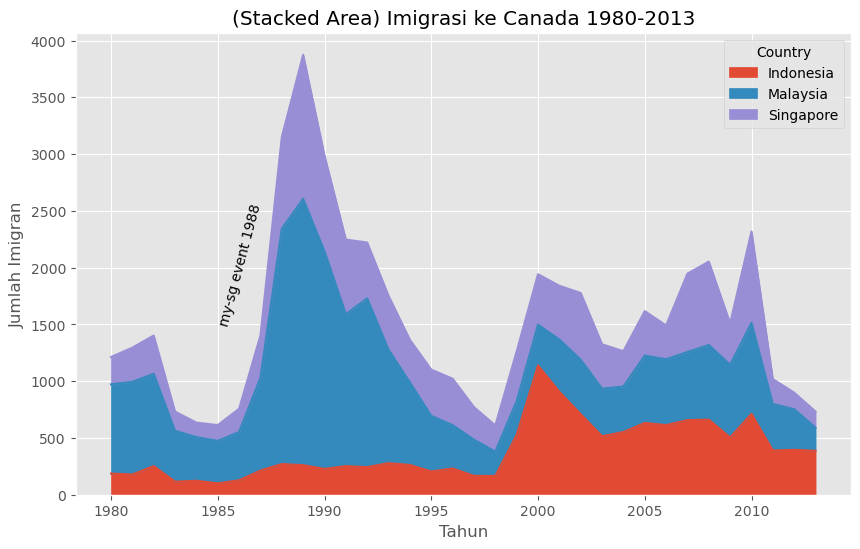

In [62]:
df_inmysg.plot(kind="area", figsize=(10,6))

plt.title("(Stacked Area) Imigrasi ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.annotate("my-sg event 1988", xy=(1985,1500), rotation=75)

plt.show()

area chart ada 2 jenis: bertumpuk (stacked) dan yang tidak (tidak stacked)

kalau bertumpuk (stacked) maka datanya di jumlah semua, digambar satu diatas yang lain.

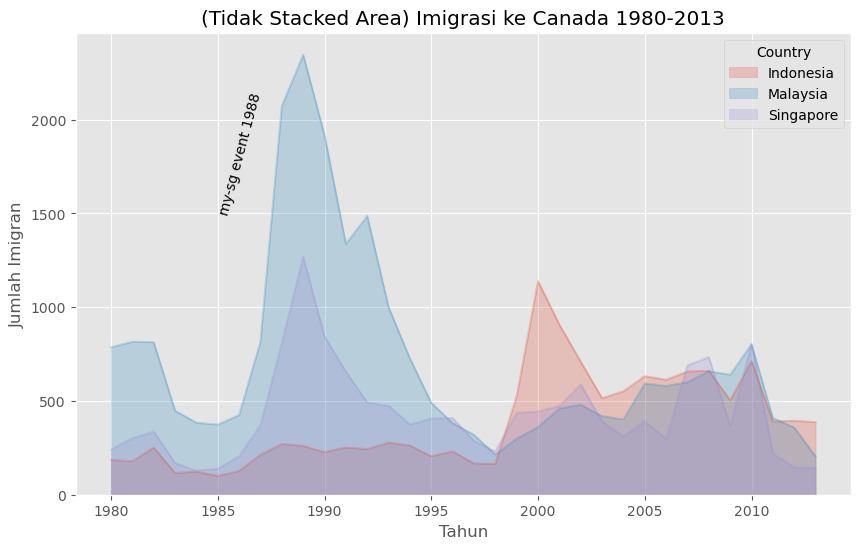

In [68]:
# opsi stacked untuk menentukan datanya dijumlah atau tidak
# opsi alpha untuk menentukan seberapa tebal warna area chartnya, 0.2 = 20% tebal, 80% transparan
df_inmysg.plot(kind="area", 
               figsize=(10,6), 
               stacked=False, 
               alpha=0.25)

plt.title("(Tidak Stacked Area) Imigrasi ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")

plt.annotate("my-sg event 1988", xy=(1985,1500), rotation=75)

plt.show()

numpuknya jadi depan belakang.

Area chart seperti line chart tapi bagian bawah garisnya diwarnai semua.

# pie chart
pie chart digunakan untuk melihat rasio, berapa banyak dari sebuah keseluruhan adalah milik 1 grup. misalkan, dari 5 benua, berapa banyak imigran yang dari Asia. Dari ASEAN, berapa banyak imigran yang dari Indonesia. dari 100 murid, berapa banyak yang lulus?

pie chart bentuknya bulat, dan di potong2 sesuai persentase bagian per grupnya. jadi biasanya jangan lebih dari 8 potong (kyk pizza) karena kalau kebanyakan, kita bingung melihat pie chartnya. misalkan ada pie chart keseluruhan imigran yang masuk Canada per negara (195 potong dari 1 bulatan pie chart). Kita tidak akan bisa melihat informasi yang relevan.

<AxesSubplot:ylabel='2010'>

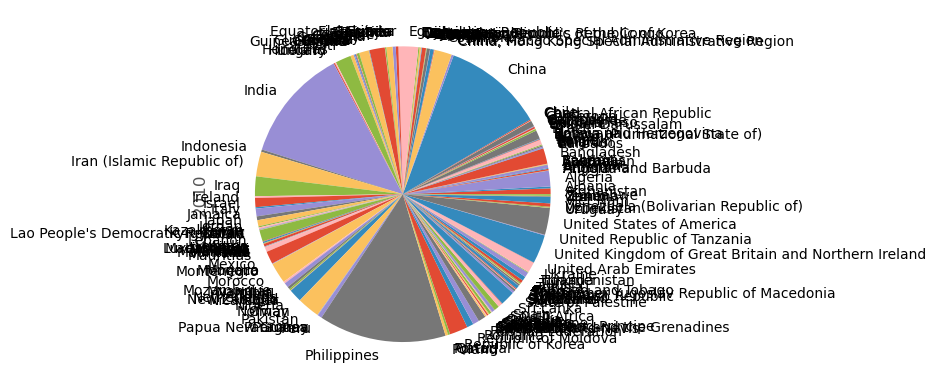

In [71]:
# demo pie chart keramean
# misal untuk melihat pembagian imigran di tahun 2010
df_can[2010].plot(kind="pie")

perhatikan bagaimana kita bisa melihat sedikit saja informasi, karena keramean. kita bisa lihat Chine, India, Philippines, sisanya terlalu bertumpuk.

jadi baiknya biasakan jumlah grup, jumlah potongan dari sebuah pie chart, jgn banyak2.

In [75]:
# demo pie chart 3 potong
# di tahun 2000, jumlah imigran dari Indonesia, Malaysia, Singapore yang ke Canada, kebanyakan dari negara yang mana dari 3 negara ini?
df_inmysg.T[2000]

Country
Indonesia    1138
Malaysia      360
Singapore     444
Name: 2000, dtype: int64

<AxesSubplot:ylabel='2000'>

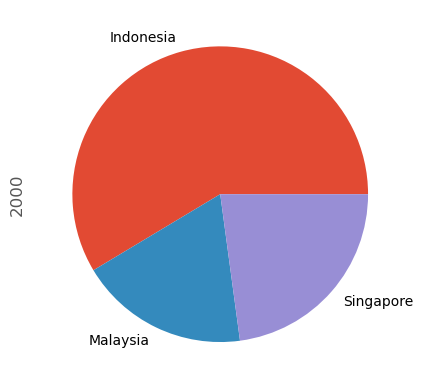

In [76]:
df_inmysg.T[2000].plot(kind="pie")

pie chart diatas bisa terbaca dengan mudah. mayoritas imigran dari 3 negara ini di tahun 2000 yang pindah ke Canada adalah orang Indonesia.

In [84]:
# bagaimana kalau kita bandingkan untuk ASEAN, total imigran dari 1980-2000 yang ke Canada, paling banyak negara mana? pembagian seperti apa?
df_asia = df_can[df_can["Continent"]=="Asia"]
df_asia['Region'].value_counts()

Western Asia          18
South-Eastern Asia    10
Southern Asia          9
Eastern Asia           7
Central Asia           5
Name: Region, dtype: int64

In [85]:
df_asean = df_asia[df_asia["Region"] == "South-Eastern Asia"]
df_asean

,Continent,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,3,4,5,11,10,5,12,6,3,6
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,348,370,529,460,354,203,200,196,233,288
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,...,552,632,613,657,661,504,712,390,395,387
Lao People's Democratic Republic,Asia,South-Eastern Asia,Developing regions,11,6,16,16,7,17,21,...,38,42,74,53,32,39,54,22,25,15
Malaysia,Asia,South-Eastern Asia,Developing regions,786,816,813,448,384,374,425,...,401,593,580,600,658,640,802,409,358,204
Myanmar,Asia,South-Eastern Asia,Developing regions,80,62,46,31,41,23,18,...,191,210,953,1887,975,1153,556,368,193,262
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Singapore,Asia,South-Eastern Asia,Developing regions,241,301,337,169,128,139,205,...,311,392,298,690,734,366,805,219,146,141
Thailand,Asia,South-Eastern Asia,Developing regions,56,53,113,65,82,66,78,...,392,575,500,487,519,512,499,396,296,400


Region "South-Eastern Asia" adalah ASEAN

In [86]:
df_asean_1980_2000 = df_asean[range(1980,2001)]
df_asean_1980_2000

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,79,6,8,2,2,4,12,16,103,63,...,65,31,36,14,17,4,6,1,3,6
Cambodia,12,19,26,33,10,7,8,14,15,27,...,38,93,418,371,286,216,313,241,165,245
Indonesia,186,178,252,115,123,100,127,213,270,260,...,252,243,278,262,205,231,166,165,525,1138
Lao People's Democratic Republic,11,6,16,16,7,17,21,20,22,44,...,33,63,44,52,40,24,31,16,31,36
Malaysia,786,816,813,448,384,374,425,817,2072,2346,...,1338,1486,1000,727,490,382,319,214,299,360
Myanmar,80,62,46,31,41,23,18,33,55,77,...,104,62,100,172,199,229,205,68,98,121
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763
Singapore,241,301,337,169,128,139,205,372,808,1269,...,657,492,474,375,407,409,287,231,437,444
Thailand,56,53,113,65,82,66,78,117,147,177,...,219,219,279,237,172,195,152,201,246,258


In [87]:
df_asean_1980_2000["Total"] = df_asean_1980_2000.sum(axis=1)
df_asean_1980_2000

C:\Users\stefa\AppData\Local\Temp\ipykernel_6100\366979280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asean_1980_2000["Total"] = df_asean_1980_2000.sum(axis=1)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,Total
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,79,6,8,2,2,4,12,16,103,63,...,31,36,14,17,4,6,1,3,6,522
Cambodia,12,19,26,33,10,7,8,14,15,27,...,93,418,371,286,216,313,241,165,245,2591
Indonesia,186,178,252,115,123,100,127,213,270,260,...,243,278,262,205,231,166,165,525,1138,5516
Lao People's Democratic Republic,11,6,16,16,7,17,21,20,22,44,...,63,44,52,40,24,31,16,31,36,584
Malaysia,786,816,813,448,384,374,425,817,2072,2346,...,1486,1000,727,490,382,319,214,299,360,17813
Myanmar,80,62,46,31,41,23,18,33,55,77,...,62,100,172,199,229,205,68,98,121,1957
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,13670,20479,19532,15864,13692,11549,8735,9734,10763,210009
Singapore,241,301,337,169,128,139,205,372,808,1269,...,492,474,375,407,409,287,231,437,444,9025
Thailand,56,53,113,65,82,66,78,117,147,177,...,219,279,237,172,195,152,201,246,258,3303


In [88]:
df_asean_1980_2000 = df_asean_1980_2000["Total"]
df_asean_1980_2000

Country
Brunei Darussalam                      522
Cambodia                              2591
Indonesia                             5516
Lao People's Democratic Republic       584
Malaysia                             17813
Myanmar                               1957
Philippines                         210009
Singapore                             9025
Thailand                              3303
Viet Nam                             70167
Name: Total, dtype: int64

ini adalah data total imigran dari 1980-2000 per negara ASEAN

<AxesSubplot:ylabel='Total'>

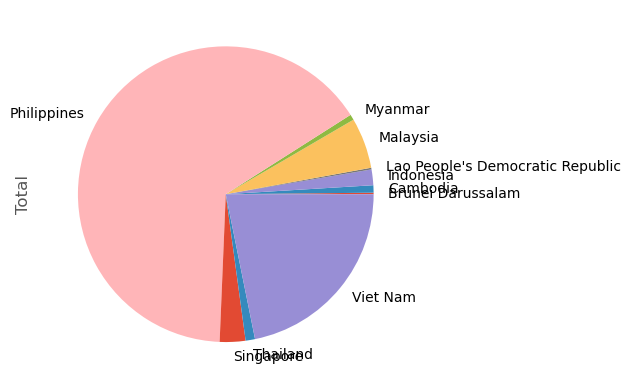

In [89]:
df_asean_1980_2000.plot(kind="pie")

plot nya bisa di edit (percantik)

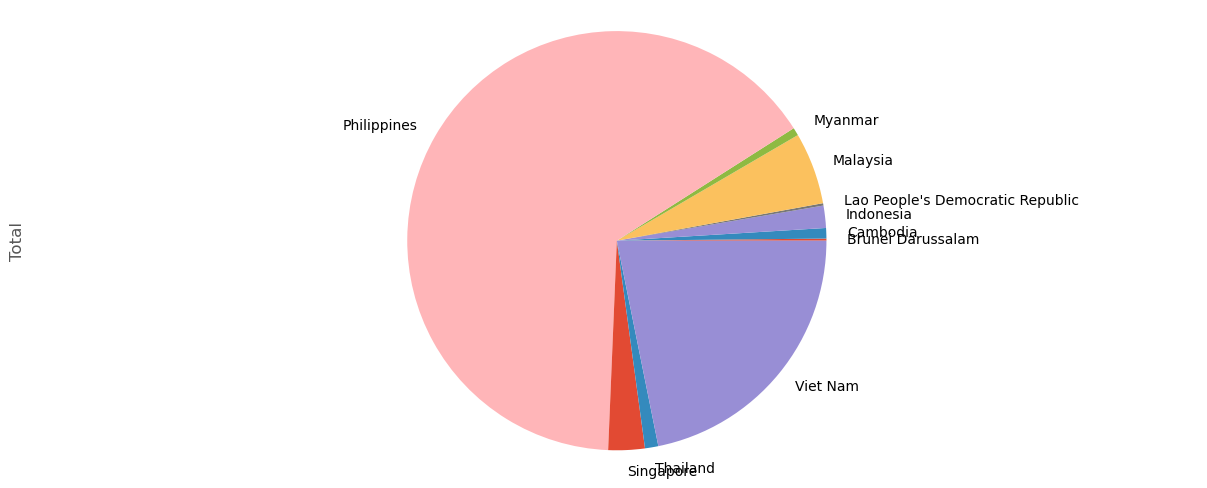

In [93]:
# ganti size
df_asean_1980_2000.plot(kind="pie",
                        figsize=(15,6))

plt.axis('equal')

plt.show()

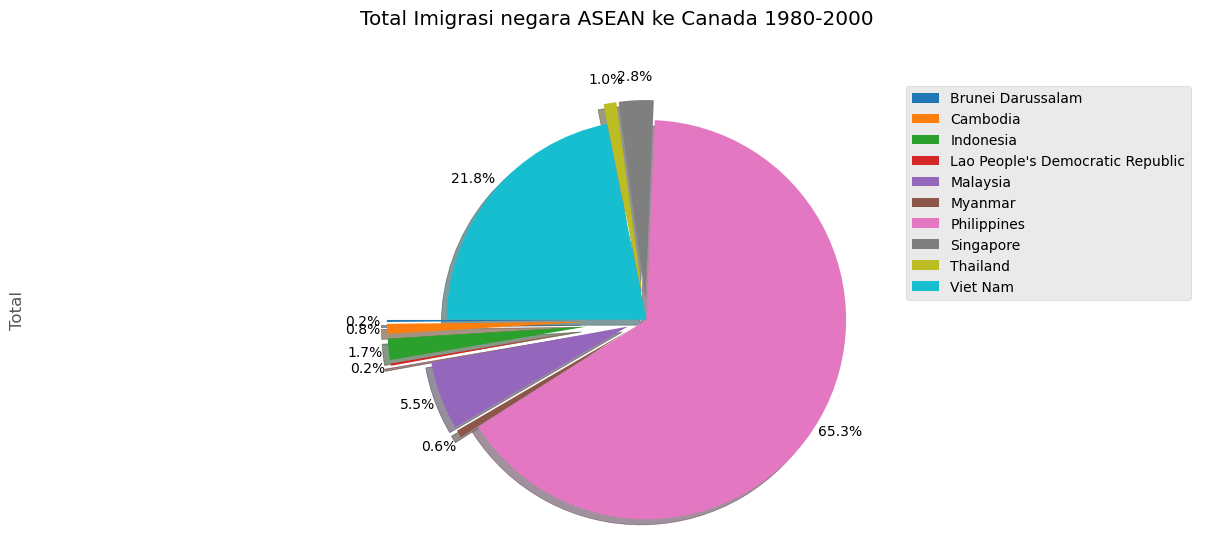

In [116]:
df_asean_1980_2000.plot(kind="pie",             # pie chart
                        autopct = '%1.1f%%',    # tambah %
                        pctdistance= 1.12,      # geser % nya
                        figsize=(15,6),         # edit ukuran, perlu tandem dengan plt.axis equal
                        shadow=True,            # tambah shadow
                        labels=None,            # hapus label
                        startangle=180,          # memutar pie nya
                        explode=[0.3, 0.3, 0.3, 0.3, 0.1, 0.1, 0, 0.1, 0.1, 0], # meledak, mengeluarkan potongan pie dari tengah pie chart
                        colors=[                # pilih warna per potongan pie
                                "tab:blue",
                                "tab:orange",
                                "tab:green",
                                "tab:red",
                                "tab:purple",
                                "tab:brown",
                                "tab:pink",
                                "tab:gray",
                                "tab:olive",
                                "tab:cyan",
                                ]
                        )            

plt.axis('equal')                               # edit ukuran, perlu tandem dengan figsize
plt.legend(df_asean_1980_2000.index)            # tambah legend

plt.title("Total Imigrasi negara ASEAN ke Canada 1980-2000", y=1.1)

plt.show()

dari pie chart ini terlihat mayoritas imigran ASEAN yang ke Canada di tahun 1980-2000 berasal dari Phillipines dan Viet Nam. Negara lain hanya memberi kontribusi dibawah 6% per negara (8 negara lain).

# Scatter Plot
melihat korelasi antara 2 set data

<AxesSubplot:xlabel='year', ylabel='Indonesia'>

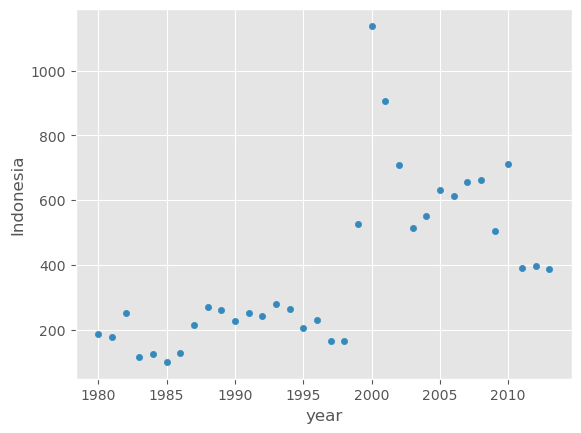

In [123]:
# ada hubungan atau tidak jumlah imigran dari Indonesia dengan tahun nya?
# apakah kalau tahun bertambah, jumlah imigran juga bertambah?

# kita reset index karena mau menggunakan index sebagai kolom data x
df_indo.reset_index().rename(columns={"index":"year"}).plot(kind="scatter",
                                                            x="year",
                                                            y="Indonesia")

kelihatannya ada sedikit korelasi antara jumlah tahun dengan jumlah imigran, tapi tidak banyak.


biar lebih jelas kalau ini BUKAN line plot, kita coba cari korelasi jumlah imigran negara Malaysia dan Singapore. Apakah kalau jumlah imgiran Singapore bertambah, maka harusnya jumlah imigran Malaysia ikut bertambah? atau Singapore bertambah maka berefek Malaysia berkurang?

<AxesSubplot:xlabel='Singapore', ylabel='Malaysia'>

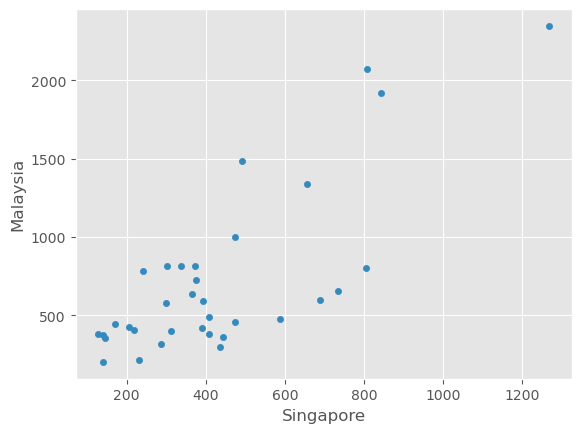

In [125]:
df_inmysg.plot(kind="scatter",
               x="Singapore",   # 1 kolom judul Singapore menjadi x-axis
               y="Malaysia")    # 1 kolom judul Malaysia menjadi y-axis

In [134]:
df_inmysg.head()

Country,Indonesia,Malaysia,Singapore
1980,186,786,241
1981,178,816,301
1982,252,813,337
1983,115,448,169
1984,123,384,128


dari scatter plot diatas sepertinya ada korelasi positif, jika Singapore bertambah imgirannya, maka Malaysia ikut bertambah juga

![Scatter Plot](./scatter.jpg)

perhatikan jenis korelasi yang bisa diperlihatkan scatter plot. positif, artinya 1 naik, 1 lagi ikutan naik. negatif, artinya 1 naik, 1 lagi malah turun. atau tidak ada korelasi, random aja, 1 naik, 1 lagi tidak peduli.

# Box Plot
Digunakan untuk melihat 5 titik yang menunjukkan summary datanya, titik tengah, Q1, Q3, secara general memperlihatkan biasanya datanya ada di angka berapa dan penyebarannya besar atau kecil.

<AxesSubplot:>

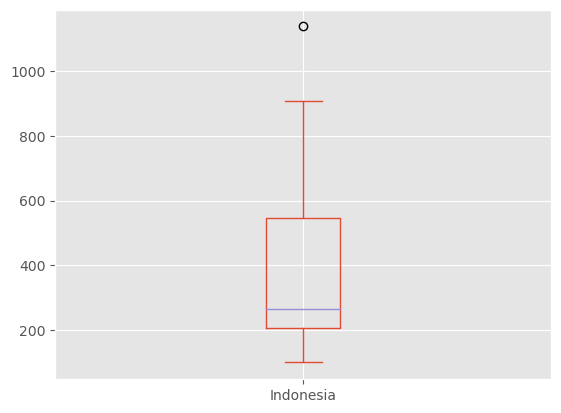

In [126]:
# Indonesia, biasanya berapa imigran yang pindah ke Canada dalam 1 tahun? angka ini +- tinggi tidak, kadang banyak banget/ dikit banget/ lebih konsisten?

df_indo.plot(kind="box")

box plot memperlihatkan median (garis ungu diatas) yang artinya 50% dari semua data kita ada di atas garis ini, 50% ada di bawah garis ini.

ukuran box nya, adalah garis bawahnya di titik 25%, garis atasnya di titik 75%, artinya setengah data kita ada di dalam box ini. 25% data tertinggi ada di atas box nya, 25% data terendah ada di bawah box nya.

sementara buntutnya panjangnya bisa beda2 tergantung data kita, tapi MAX panjangnya adalah 1.5 x panjang box nya.

data yang berada di luar buntut menjadi outlier (pencilan), dianggap data yang luar biasa.

<AxesSubplot:>

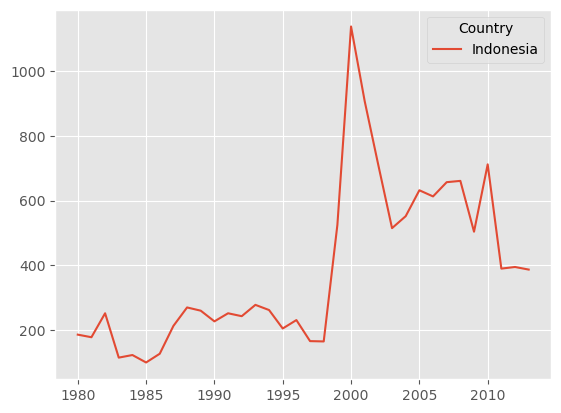

In [127]:
df_indo.plot()

<AxesSubplot:>

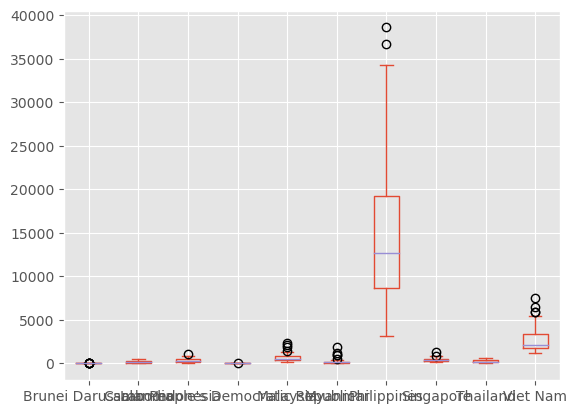

In [131]:
# beberapa box plot sekaligus
# misalkan kita bandingkan negara2 asean

df_asean[years].T.plot(kind="box")

philippine banyak sendiri sampai data2 negara lain terlihat tidak signifikan. viet nam masih kelihatan juga, mungkin lebih berguna kalau 2 negara ini kita keluarkan dulu baru kita lihat perbandingan 8 negara saja.

kita lihat 3 negara kita yang jumlah imigran mirip2 juga bisa.

<AxesSubplot:>

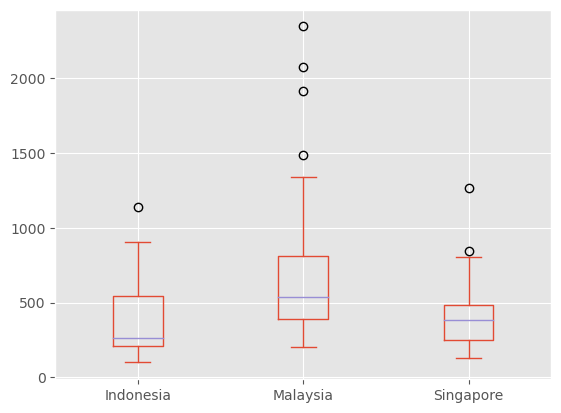

In [133]:
df_inmysg.plot(kind="box")

terlihat kalau dari 3 negara ini malaysia paling banyak kirim imigran (jumlah). singapore paling konsisten. Indonesia paling sedikit.

kita break 10 menit lalu masuk ke histogram.

# Histogram
histogram digunakan untuk melihat distribusi data.

misalkan ada 100 murid di kelas, dengan range nilai dari 0-100, kita bisa minta bikin histogram dengan:
- 10 braket, bins, 10 bins - jumlah bins bisa kita atur mau berapa
- dia otomatis bagi, ada berapa murid yang masuk ke masing-masing braket/bin
- dia plot dengan tampilan mirip bar chart TAPI bukan bar chart, untuk setiap braket/bin, ada berapa murid itu yang jadi value nya. bukan nilainya.

perhatikan kalau kita menggunakan line chart, bar chart, area plot, maka yang di plot adalah nilai murid tersebut satu per satu, 100 titik berbeda. tapi kalau di histogram yang di plot adalah JUMLAH murid yang masuk ke satu braket/bin. ada berapa murid yang di nilai 0-10? 10-20? ... 90-100? total ada 10 bin (tadi kita pilih).

yang di plot adalah jumlah data per braket/bin tertentu.

In [136]:
df_indo.head()

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123


<AxesSubplot:>

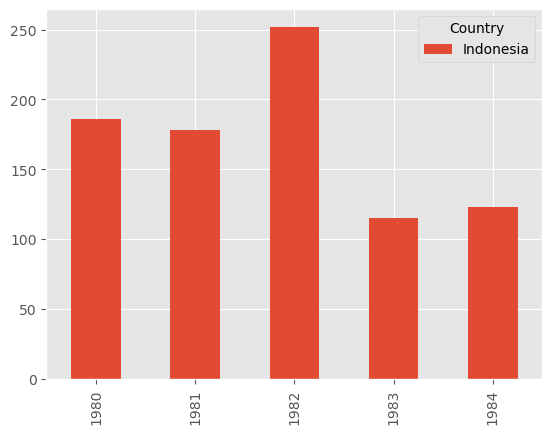

In [139]:
# di bar chart, 1 titik data => 1 bar
df_indo.head().plot(kind="bar")

5 data berarti 5 bar.

kalau di histogram, kita perlu persiapan data dulu. 
1. mau ada berapa bar? 
2. setelah memilih jumlah bar/braket/bins, kita perlu hitung dulu dari seluruh data kita, ada berapa jumlah data yang masuk ke masing masing bar/braket/bin.
3. baru di plot per bin, JUMLAH data berapa

<AxesSubplot:ylabel='Frequency'>

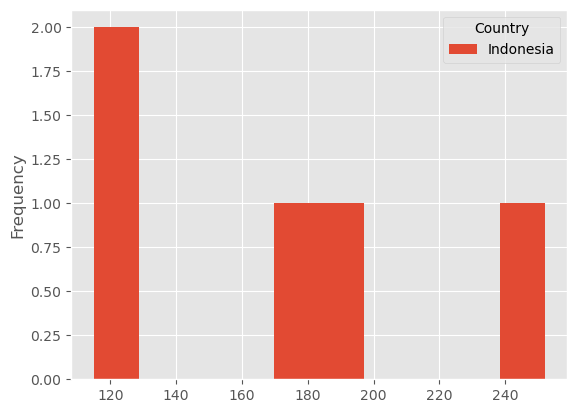

In [140]:
df_indo.head().plot(kind="hist")

secara default akan membuat 10 bin.

di plot diatas, perhatikan label x-axis Tidak Pas dengan bin nya. jadi kita sulit membaca histogramnya.

jadi kita minta bantuan numpy untuk hitung dulu bin2nya ada di angka berapa aja, lalu kita set x-axis label nya ke angka2 tersebut biar pas.

In [141]:
np.histogram(df_indo.head())

(array([2, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64),
 array([115. , 128.7, 142.4, 156.1, 169.8, 183.5, 197.2, 210.9, 224.6,
        238.3, 252. ]))

numpy.histogram akan kasih 2 array, yaitu
1. jumlah data di satu BIN
2. range per BIN nya

di contoh diatas, bin pertama adalah 115-128.7, ada 2 DATA di dalam bin tersebut

total cuma ada 5 data karena kita pakai df_indo.head() memang cuma 5 data.

<AxesSubplot:ylabel='Frequency'>

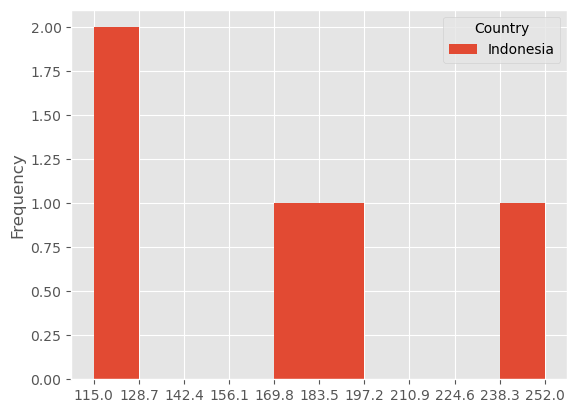

In [143]:
freq, bin_edges = np.histogram(df_indo.head())

df_indo.head().plot(kind="hist",
                    xticks = bin_edges)

dari 5 titik data yang kita berikan,   
2 masuk ke braket/bin 115-128.7   
1 masuk ke bin 169.8-183.5   
1 masuk ke bin 183.5-197.2   
1 masuk ke bin 238.3-252.0   

In [144]:
df_indo.head()

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123


kalau data lebih banyak, kita sesuaikan jumlah bins, biasanya baru kita bisa melihat pattern tertentu dan menarik analisa dari sebuah histogram

In [146]:
df_indo.shape

(34, 1)

kita gunakan 34 titik data

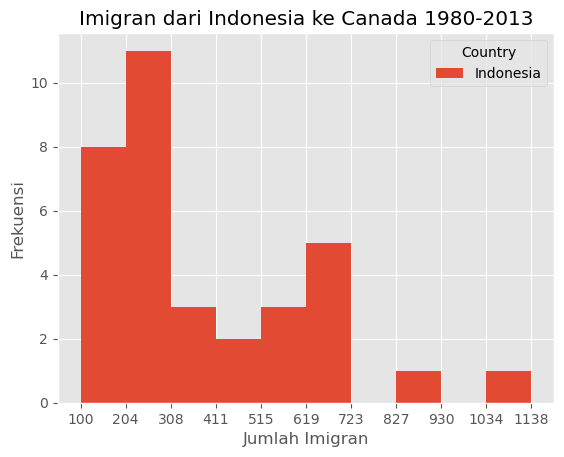

In [148]:
data = df_indo

freq, bin_edges = np.histogram(data)

data.plot(kind="hist",
            xticks=bin_edges)

plt.title("Imigran dari Indonesia ke Canada 1980-2013")
plt.xlabel("Jumlah Imigran")
plt.ylabel("Frekuensi")

plt.show()

histogram diatas menunjukkan kalau Indonesia umumnya mengirim sekitar 204-308 orang ke Canada per tahun. Kedua paling sering mengirim 100-204 orang per tahun. Ada anomali 2 kali dimana kita kirim jauh lebih banyak orang di atas 800 orang dalam 1 tahun.

kita bisa coba ubah jumlah bin untuk melihat bentuk data yang lebih memberi insight.

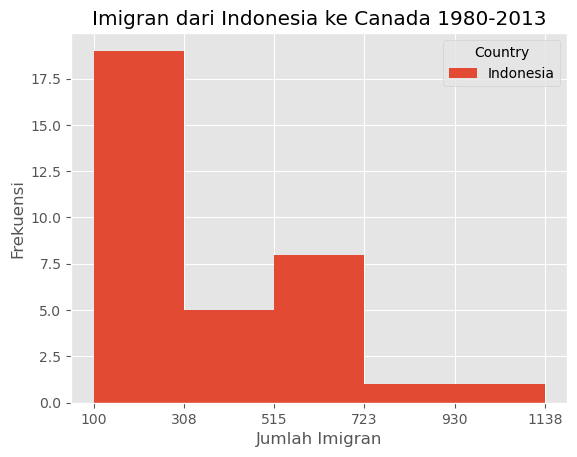

In [149]:
data = df_indo
n = 5

freq, bin_edges = np.histogram(data, bins=n)

data.plot(  kind="hist",
            xticks=bin_edges,
            bins=n)

plt.title("Imigran dari Indonesia ke Canada 1980-2013")
plt.xlabel("Jumlah Imigran")
plt.ylabel("Frekuensi")

plt.show()

contohnya, jika histogram kita hanya 5 bin, kita lebih bisa mendapat sebuah pattern dari histogramnya.

biasanya Indonesia mengirim 100-308 orang ke Canada dalam 1 tahun, diatas angka tersebut, semakin tinggi jumlahnya yang tinggi semakin jarang terjadi.

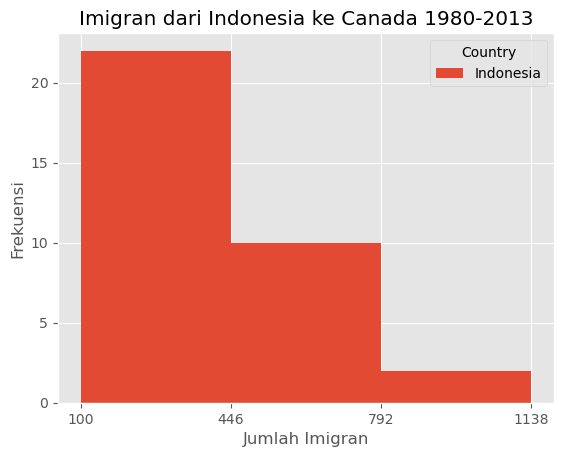

In [152]:
data = df_indo
n = 3

freq, bin_edges = np.histogram(data, bins=n)

data.plot(  kind="hist",
            xticks=bin_edges,
            bins=n)

plt.title("Imigran dari Indonesia ke Canada 1980-2013")
plt.xlabel("Jumlah Imigran")
plt.ylabel("Frekuensi")

plt.show()

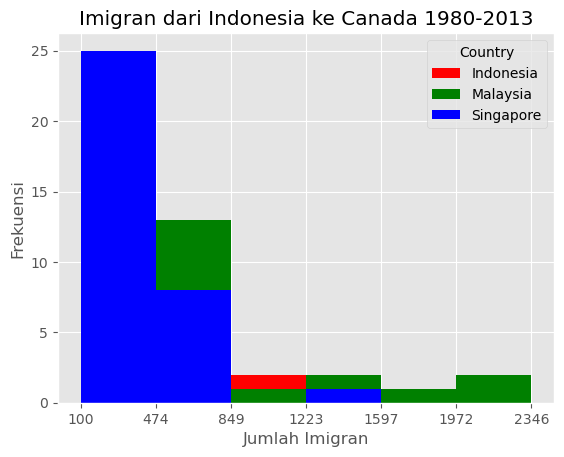

In [161]:
data = df_inmysg
n = 6

freq, bin_edges = np.histogram(data, bins=n)

data.plot(  kind="hist",
            xticks=bin_edges,
            bins=n,
            color=['r','g','b']
            )

plt.title("Imigran dari Indonesia ke Canada 1980-2013")
plt.xlabel("Jumlah Imigran")
plt.ylabel("Frekuensi")

plt.show()

perbandingan histogram boleh dicoba edit2 sampai terlihat datanya, di contoh diatas data Indonesia hampir tertutup semua